In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

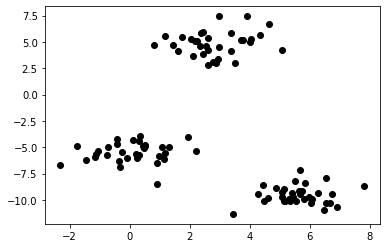

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, _ = make_blobs(random_state=10)
plt.scatter(X[:,0], X[:,1], color='black')

In [3]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print(X)
print(X[:,1])

[[ -2.325  -6.7  ]
 [  0.519  -4.901]
 [  2.443   3.847]
 [  5.827  -9.923]
 [  2.033   5.29 ]
 [  3.38    4.189]
 [  6.048 -10.305]
 [ -0.421  -4.249]
 [  3.781   5.221]
 [  5.692  -7.2  ]
 [  5.159 -10.134]
 [  1.165   5.597]
 [  2.946   3.358]
 [  1.188  -5.561]
 [ -0.317  -6.863]
 [  4.33    5.644]
 [  4.29   -9.45 ]
 [  3.5     3.022]
 [  5.314  -9.947]
 [  2.611   4.222]
 [  4.887  -8.877]
 [  1.956  -4.057]
 [  2.1     3.656]
 [  1.315  -5.011]
 [  5.526  -8.187]
 [  0.817   4.753]
 [  2.529   4.576]
 [  3.695   5.143]
 [  2.377   5.824]
 [  5.692  -9.476]
 [  0.917  -6.526]
 [  1.447   4.754]
 [  2.966   4.505]
 [  6.683 -10.317]
 [ -0.436  -4.722]
 [  0.348  -3.89 ]
 [  0.977  -5.798]
 [  2.457   5.965]
 [  2.607   2.844]
 [  2.89    2.982]
 [ -1.741  -4.892]
 [  5.859  -8.382]
 [ -1.11   -5.627]
 [  0.244  -6.019]
 [  4.056   5.322]
 [  5.559 -10.061]
 [  5.992  -9.732]
 [  4.461  -8.557]
 [ -1.055  -5.344]
 [  6.911 -10.665]
 [  3.909   7.441]
 [  2.195  -5.387]
 [  3.449 -1

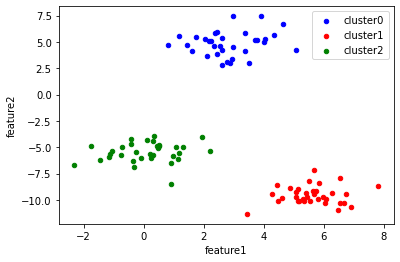

In [4]:
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

In [5]:
import requests, zipfile
import io

url_base = 'http://archive.ics.uci.edu/ml/machine-learning-databases/'
url = url_base + '00222/bank.zip'

res = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(res.content))
z.extractall()
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
print('データ形式: {}'.format(bank.shape))

データ形式: (45211, 17)


In [7]:
bank.isnull().sum().sum()

0

In [8]:
from sklearn.preprocessing import StandardScaler
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

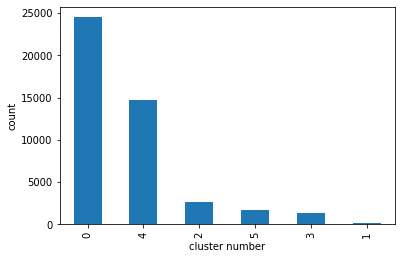

In [9]:
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))
ax = labels.value_counts(sort=True).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

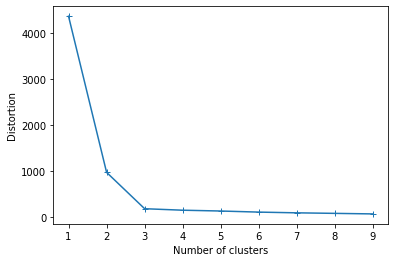

In [10]:
dist_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
    
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

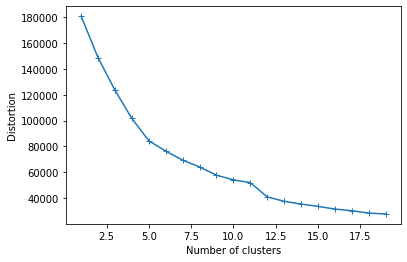

In [11]:
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [12]:
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [13]:
labels

0        4
1        4
2        0
3        4
4        0
        ..
45206    4
45207    4
45208    4
45209    4
45210    3
Name: cluster_number, Length: 45211, dtype: int32

In [14]:
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


In [15]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

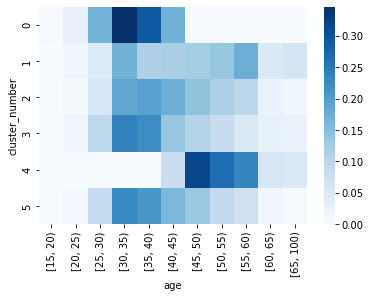

In [16]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

In [17]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<AxesSubplot:xlabel='job', ylabel='cluster_number'>

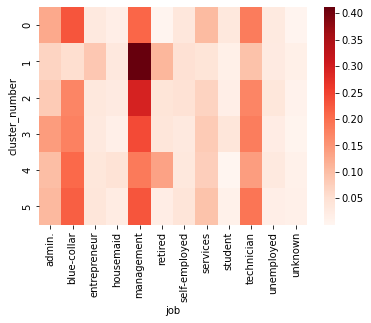

In [18]:
sns.heatmap(cross_cluster_job.apply(lambda x: x/x.sum(), axis=1), cmap='Reds')

[[-6.253e-01 -1.701e-01]
 [ 9.607e-01  5.909e-01]
 [-5.985e-01 -4.026e-01]
 [-2.228e+00 -5.326e-01]
 [-4.614e-01 -4.989e-01]
 [-9.589e-01 -2.693e-01]
 [-6.731e-01 -3.383e-01]
 [ 1.305e+00  5.914e-01]
 [ 3.745e-01 -9.854e-02]
 [-1.826e+00 -4.062e-01]
 [ 6.683e-01  3.369e-01]
 [-5.826e-01 -1.774e-01]
 [-4.181e-01 -3.738e-01]
 [ 1.722e-01  2.647e-01]
 [ 3.771e-01  1.884e-01]
 [-6.794e-01 -1.316e-01]
 [ 1.031e+00  4.256e-01]
 [ 3.360e-01  3.910e-02]
 [ 7.057e-01  4.887e-01]
 [ 8.395e-01  1.521e-01]
 [ 1.499e+00  4.714e-01]
 [ 2.884e-01  3.313e-02]
 [-5.029e-01 -3.687e-01]
 [ 1.479e+00  7.404e-01]
 [-4.444e-01 -1.650e-01]
 [-5.335e-01 -6.022e-02]
 [-6.162e-01 -2.118e-01]
 [ 7.466e-02 -6.143e-02]
 [-1.136e-01  7.329e-02]
 [-2.007e-02  6.097e-02]
 [ 1.896e-01  1.998e-01]
 [ 9.385e-01  5.417e-01]
 [-3.667e-01 -3.650e-02]
 [-8.935e-01 -3.728e-01]
 [-1.318e+00 -3.576e-01]
 [-3.818e-01 -2.013e-01]
 [-5.138e-01 -5.060e-01]
 [ 9.037e-01  2.495e-01]
 [-4.389e-01 -1.506e-01]
 [-5.942e-01 -9.412e-02]


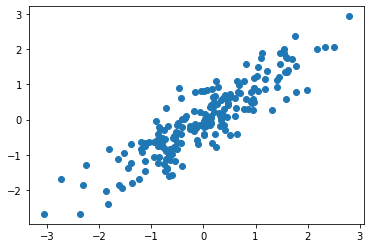

In [19]:
from sklearn.preprocessing import StandardScaler
sample = np.random.RandomState(1)

X = np.dot(sample.rand(2,2), sample.randn(2,200)).T
print(X)

sc = StandardScaler()
X_std = sc.fit_transform(X)
print(X_std)

print('相関係数: {:.3f}: '.format(sp.stats.pearsonr(X_std[:,0], X_std[:, 1])[0]))
plt.scatter(X_std[:,0], X_std[:,1])

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)

PCA(n_components=2)

In [21]:
print(pca.components_)

[[-0.707 -0.707]
 [-0.707  0.707]]


In [22]:
print('各主成分の分散:{}'.format(pca.explained_variance_))

各主成分の分散:[1.899 0.111]


In [23]:
print('各主成分の分散割合:{}'.format(pca.explained_variance_ratio_))

各主成分の分散割合:[0.945 0.055]


(-3.353, 3.079, -2.961, 3.216)

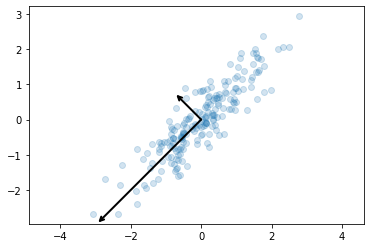

In [24]:
arrowprops = dict(
                arrowstyle='->',
                 linewidth=2,
                 shrinkA=0,
                 shrinkB=0)

def draw_vector(v0, v1):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X_std[:, 0], X_std[:,1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

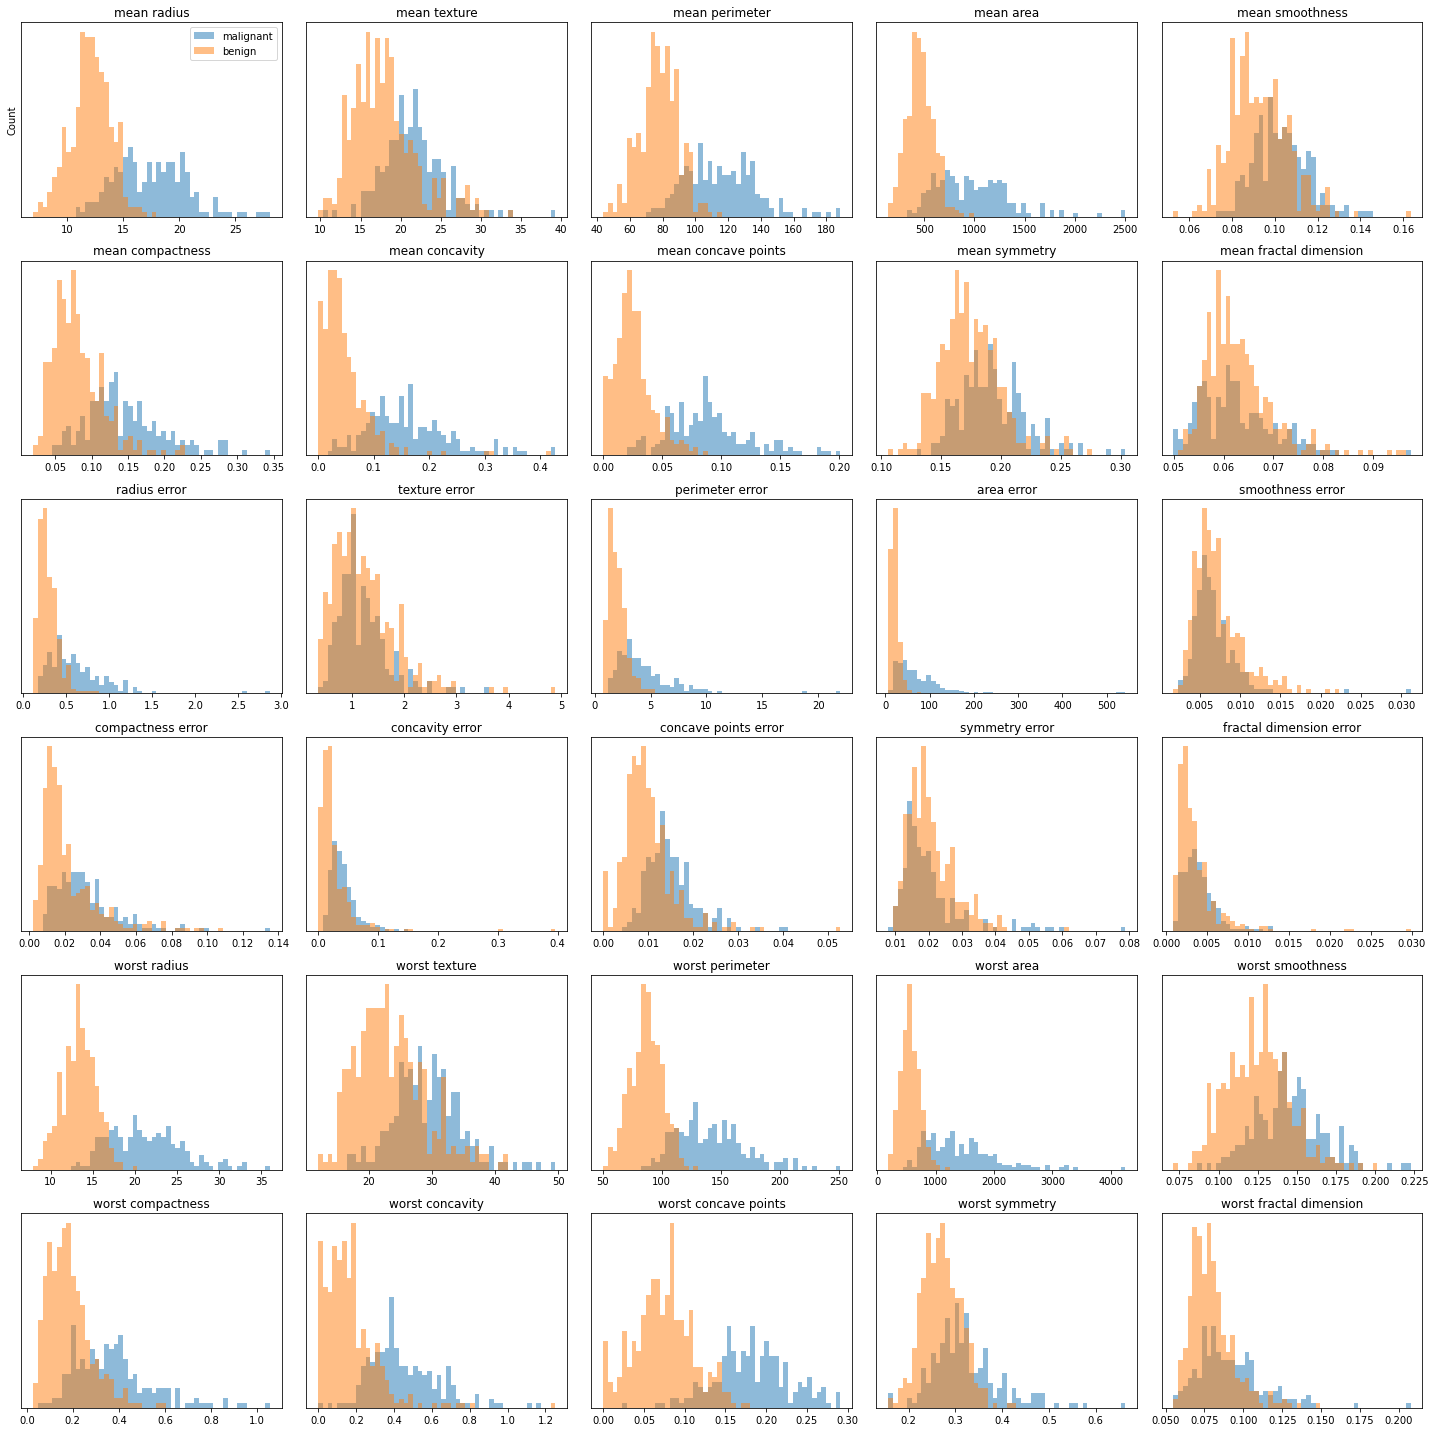

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _, bins=np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:, i], bins, alpha=.5)
    ax[i].hist(benign[:, i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_ylabel('Count')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

In [26]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca_shape:{}'.format(X_pca.shape))
print('Explained variance ratio: {}'.format(pca.explained_variance_ratio_))

X_pca_shape:(569, 2)
Explained variance ratio: [0.443 0.19 ]


In [27]:
X_std.shape

(569, 30)

In [28]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

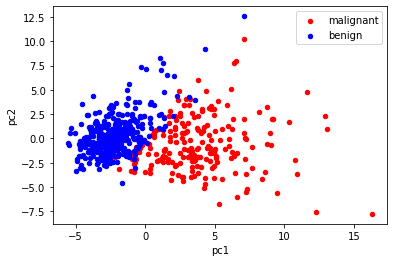

In [29]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant')
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax)

In [32]:
trans = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [33]:
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [34]:
trans.shape

(541909, 8)

In [35]:
trans['cancel_flg'] = trans.InvoiceNo.map(lambda x: str(x)[0])
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [37]:
trans = trans[(trans.cancel_flg=='5') & trans.CustomerID.notnull()]

In [38]:
trans['StockCode'].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

In [45]:
trans_all = set(trans.InvoiceNo)
trans_a = set(trans[trans['StockCode'] == '85123A'].InvoiceNo)
print('85123A: ', len(trans_a))

trans_b =set(trans[trans['StockCode'] == '85099B'].InvoiceNo)
print('85099B: ', len(trans_b))

85123A:  1978
85099B:  1600


In [46]:
trans_ab = trans_a&trans_b
print(len(trans_ab))

252


In [49]:
print('両方の商品を含むバスケットの数: ', len(trans_ab))
print('両方の商品を含むバスケットの全体に占める割合: {:.3f}'.format(len(trans_ab)/len(trans_all)))
# 支持度

両方の商品を含むバスケットの数:  252
両方の商品を含むバスケットの全体に占める割合: 0.014


In [51]:
print('8512Aのバスケット数: {}'.format(len(trans_a)))
print('8512Aのバスケットの全体に占める割合; {:.3f}'.format(len(trans_a)/len(trans_all)))

8512Aのバスケット数: 1978
8512Aのバスケットの全体に占める割合; 0.107


In [52]:
print('確信度: {:.3f}'.format(len(trans_ab)/len(trans_a)))

確信度: 0.127


In [53]:
print('確信度: {:.3f}'.format(len(trans_ab)/len(trans_b)))

確信度: 0.158


In [54]:
support_b = len(trans_b) / len(trans_all)
confidence = len(trans_ab)/ len(trans_a)

In [55]:
lift = confidence / support_b
print('lift: {:.3f}'.format(lift))

lift: 1.476
